# Определение выгодного тарифа для телеком компании

## 1. Обзор данных
Импортируем необходимые библиотеки и составим первичное представление о данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### 1.1 Функции <a id="1.1"></a>

#### 1.1.1 Функция для первичного анализа <a id="1.1.1"></a>

In [2]:
def first_rev(df):
    print('info')
    display(df.info(memory_usage='deep'))
    print('describe')
    display(df.describe().T.round(3))
    print('head')
    display(df.head())
    print('duplicated')
    display(df.duplicated().sum())

#### 1.1.2 Функция для расчета помесячной выручки с каждого пользователя <a id="1.1.2"></a>

In [3]:
def income(row):
    call = 0
    message = 0
    gb = 0
    if (row['calls_duration'] - row['minutes_included']) > 0:
        call = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    if (row['messages'] - row['messages_included']) > 0:
        message = (row['messages'] - row['messages_included']) * row['rub_per_message']
    if (row['gb_used'] - row['gb_per_month_included']) > 0:
        gb = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
 
    return call + message + gb + row['rub_monthly_fee']

### 1.2 Обзор данных о пользователях

In [4]:
df_users = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 1\Проекты\4. Статистический анализ данных _ users.csv")

In [5]:
first_rev(df_users)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 229.6 KB


None

describe


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.482,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.668,18.0,32.00,46.0,62.00,75.0


head


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


duplicated


0

#### 1.2.1 Вывод

Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

### 1.3 Обзор данных о звонках

In [6]:
df_calls = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 1\Проекты\4. Статистический анализ данных _ calls.csv")

In [7]:
first_rev(df_calls)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6 MB


None

describe


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.756,5.843,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.941,144.723,1000.0,1126.0,1260.0,1379.0,1499.0


head


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


duplicated


0

#### 1.3.1 Вывод

Таблица calls (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

### 1.4 Обзор данных о сообщениях

In [8]:
df_messages = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 1\Проекты\4. Статистический анализ данных _ messages.csv")

In [9]:
first_rev(df_messages)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.4 MB


None

describe


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.989,143.524,1000.0,1134.0,1271.0,1381.0,1499.0


head


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


duplicated


0

#### 1.4.1 Вывод

Таблица messages (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

### 1.5 Обзор данных об интернет-сессиях

In [10]:
df_internet = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 1\Проекты\4. Статистический анализ данных _ internet.csv")

In [11]:
first_rev(df_internet)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 22.2 MB


None

describe


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500,43127.055,0.0,37348.750,74697.500,112046.250,149395.00
mb_used,149396.0,370.192,278.301,0.0,138.188,348.015,559.552,1724.83
user_id,149396.0,1252.100,144.051,1000.0,1130.000,1251.000,1380.000,1499.00


head


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


duplicated


0

In [12]:
df_internet = df_internet.drop(columns='Unnamed: 0', axis = 1)

#### 1.5.1 Вывод

Таблица internet (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id`— идентификатор пользователя
* `Unnamed: 0` — столбец с нумерацией строк (дублирует индексы датафрейма), удалили

### 1.6 Обзор данных о тарифах

In [13]:
df_tariffs = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 1\Проекты\4. Статистический анализ данных _ tariffs.csv")

In [14]:
first_rev(df_tariffs)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 364.0 bytes


None

describe


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.767,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414,1.0,1.5,2.0,2.5,3.0


head


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


duplicated


0

#### 1.6.1 Вывод

Таблица tariffs (информация о тарифах):
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Описание тарифов:**
1. Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей
2. Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

**Примечание:**
«Мегалайн» всегда округляет:
* Секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
* Мегабайты — до гигабайт. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## 2. Предобработка данных

### 2.1 Пропуски значений

In [15]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

#### 2.1.1 Вывод

Пропуски в датафрейме df_users `churn_date`, значит, что тариф ещё действовал на момент выгрузки данных.

Других пропусков не обнаружено.

### 2.2 Тип данных
У части столбцов можно изменить тип данных для удобства и скорости анализа.

#### 2.2.1 Пользователи

In [16]:
df_users['age'] = df_users['age'].astype(np.uint8, errors='ignore')

In [17]:
df_users['user_id'] = df_users['user_id'].astype(np.uint16, errors='ignore')

In [18]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [19]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [20]:
df_users.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    uint16        
 1   age         500 non-null    uint8         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), object(4), uint16(1), uint8(1)
memory usage: 204.5 KB


#### 2.2.2 Звонки
При изменении типов сразу округлим продолжительность звонков в большую сторону, так как «Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [21]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [22]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(np.uint8, errors='ignore')

In [23]:
df_calls['user_id'] = df_calls['user_id'].astype(np.uint16, errors='ignore')

In [24]:
df_calls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  uint8         
 3   user_id    202607 non-null  uint16        
dtypes: datetime64[ns](1), object(1), uint16(1), uint8(1)
memory usage: 14.6 MB


#### 2.2.3 Сообщения

In [25]:
df_messages['user_id'] = df_messages['user_id'].astype(np.uint16, errors='ignore')

In [26]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [27]:
df_messages.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  uint16        
dtypes: datetime64[ns](1), object(1), uint16(1)
memory usage: 8.8 MB


#### 2.2.4 Интернет-сессии

In [28]:
df_internet['mb_used'] = df_internet['mb_used'].astype(np.float16, errors='ignore')

In [29]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [30]:
df_internet['user_id'] = df_internet['user_id'].astype(np.uint16, errors='ignore')

In [31]:
df_internet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float16       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  uint16        
dtypes: datetime64[ns](1), float16(1), object(1), uint16(1)
memory usage: 10.9 MB


#### 2.2.5 Тарифы

In [32]:
for colomns in df_tariffs:
    if colomns != 'tariff_name':
        df_tariffs[colomns] = df_tariffs[colomns].astype(np.uint16, errors='ignore')

In [33]:
df_tariffs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      uint16
 1   mb_per_month_included  2 non-null      uint16
 2   minutes_included       2 non-null      uint16
 3   rub_monthly_fee        2 non-null      uint16
 4   rub_per_gb             2 non-null      uint16
 5   rub_per_message        2 non-null      uint16
 6   rub_per_minute         2 non-null      uint16
 7   tariff_name            2 non-null      object
dtypes: object(1), uint16(7)
memory usage: 280.0 bytes


#### 2.2.6 Вывод
Изменили типы данных для датафреймов.

### 2.3 Проверка на нормальность
Проверка неявных дубликатов и выбивающихся значений.

#### 2.3.1 Пользователи

In [34]:
df_users['churn_date'].dt.year.value_counts()

2018.0    38
Name: churn_date, dtype: int64

In [35]:
sorted(df_users['city'].unique())

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

In [36]:
df_users['reg_date'].dt.year.value_counts()

2018    500
Name: reg_date, dtype: int64

#### 2.3.2 Звонки

In [37]:
df_calls['call_date'].dt.year.value_counts()

2018    202607
Name: call_date, dtype: int64

In [38]:
df_users['reg_date'].dt.year.value_counts()

2018    500
Name: reg_date, dtype: int64

#### 2.3.3 Сообщения

In [39]:
df_messages['message_date'].dt.year.value_counts()

2018    123036
Name: message_date, dtype: int64

#### 2.3.4 Интернет-сессии

In [40]:
df_internet['session_date'].dt.year.value_counts()

2018    149396
Name: session_date, dtype: int64

#### 2.3.5 Вывод
Существенных отклонений не найдено.

### 2.4 Вывод

Проверили на ошибки стили заголовков, дубликаты, пропуски значений. Существенных отклонений не найдено.

Изменили тип данных в датафреймах для удобства и скорости анализа, в том числе округлили значения исрасходованных минут и интернет-трафика в мегабайтах в большую сторону.

Проверили данные на нормальность и выбивающиеся значения. Существенных отклонений не найдено.

## 3 Добавление данных

### 3.1 Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [41]:
df_calls['month'] = df_calls['call_date'].dt.month

In [42]:
df_calls_user = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
df_calls_user

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0


In [43]:
df_calls_user.columns = ['user_id', 'month', 'calls', 'calls_duration']

### 3.2 Количество отправленных сообщений по месяцам для каждого пользователя

In [44]:
df_messages['month'] = df_messages['message_date'].dt.month

In [45]:
df_messages_user = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages_user

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [46]:
df_messages_user.columns = ['user_id', 'month', 'messages']

### 3.3 Объем израсходованного интернет-трафика по месяцам для каждого пользователя

При расчете округлим общую сумму трафика за месяц в бо́льшую сторону и переведем мегабайты в гигабайты, так как если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [47]:
df_internet['month'] = df_internet['session_date'].dt.month

In [48]:
df_internet_user = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_user

,user_id,month,mb_used
0,1000,5,2254.0
1,1000,6,23232.0
2,1000,7,14008.0
3,1000,8,14056.0
4,1000,9,14568.0
...,...,...,...
3198,1498,10,20576.0
3199,1499,9,1846.0
3200,1499,10,17792.0
3201,1499,11,17968.0


In [49]:
df_internet_user['gb_used'] = np.ceil(df_internet_user['mb_used']/1024).astype(np.uint16, errors='ignore')
df_internet_user

,user_id,month,mb_used,gb_used
0,1000,5,2254.0,3
1,1000,6,23232.0,23
2,1000,7,14008.0,14
3,1000,8,14056.0,14
4,1000,9,14568.0,15
...,...,...,...,...
3198,1498,10,20576.0,21
3199,1499,9,1846.0,2
3200,1499,10,17792.0,18
3201,1499,11,17968.0,18


In [50]:
df_internet_user = df_internet_user.drop(columns = ['mb_used'],axis = 1)

### 3.4 Объединение данных

Соединим в единую табличку данные по израсходованным звонкам, сообщениям и интернет-трафике по месяцам для каждого пользователя, а также добавим о самих пользователях и о тарифе.

In [51]:
df = df_calls_user.merge(df_messages_user, on=['user_id', 'month'], how='outer')
df = df.merge(df_internet_user, on=['user_id', 'month'], how='outer')
df

,user_id,month,calls,calls_duration,messages,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0
3210,1489,10,NaN,NaN,21.0,20.0
3211,1489,11,NaN,NaN,20.0,18.0
3212,1489,12,NaN,NaN,35.0,17.0


In [52]:
columns_to_replace = ['calls', 'calls_duration', 'messages', 'gb_used']
for colomns in columns_to_replace:
    df[colomns] = df[colomns].fillna(0)

In [53]:
df = df.astype(np.uint16, errors='ignore')

In [54]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [55]:
df_users = df_users.drop(columns = ['churn_date', 'first_name', 'last_name', 'reg_date'],axis = 1)

In [56]:
df = df.merge(df_users, on='user_id', how='left')
df.head()

,user_id,month,calls,calls_duration,messages,gb_used,age,city,tariff
0,1000,5,22,159,22,3,52,Краснодар,ultra
1,1000,6,43,172,60,23,52,Краснодар,ultra
2,1000,7,47,340,75,14,52,Краснодар,ultra
3,1000,8,52,408,81,14,52,Краснодар,ultra
4,1000,9,58,466,57,15,52,Краснодар,ultra


In [57]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [58]:
df_tariffs['gb_per_month_included'] = np.ceil(df_tariffs['mb_per_month_included']/1024).astype(np.uint16, errors='ignore')
df_tariffs = df_tariffs.drop(columns = ['mb_per_month_included'],axis = 1)
df_tariffs

,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,500,550,200,3,3,smart,15
1,1000,3000,1950,150,1,1,ultra,30


In [59]:
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

In [60]:
df = df.merge(df_tariffs, on='tariff', how='left')
df.head()

,user_id,month,calls,calls_duration,messages,gb_used,age,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22,159,22,3,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
1,1000,6,43,172,60,23,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
2,1000,7,47,340,75,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
3,1000,8,52,408,81,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
4,1000,9,58,466,57,15,52,Краснодар,ultra,1000,3000,1950,150,1,1,30


In [61]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   uint16
 1   month                  3214 non-null   uint16
 2   calls                  3214 non-null   uint16
 3   calls_duration         3214 non-null   uint16
 4   messages               3214 non-null   uint16
 5   gb_used                3214 non-null   uint16
 6   age                    3214 non-null   uint8 
 7   city                   3214 non-null   object
 8   tariff                 3214 non-null   object
 9   messages_included      3214 non-null   uint16
 10  minutes_included       3214 non-null   uint16
 11  rub_monthly_fee        3214 non-null   uint16
 12  rub_per_gb             3214 non-null   uint16
 13  rub_per_message        3214 non-null   uint16
 14  rub_per_minute         3214 non-null   uint16
 15  gb_per_month_included

### 3.5 Помесячная выручка с каждого пользователя

Расчет: вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; плюс абонентская плата, соответствующую тарифному плану.

In [62]:
df.head()

,user_id,month,calls,calls_duration,messages,gb_used,age,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22,159,22,3,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
1,1000,6,43,172,60,23,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
2,1000,7,47,340,75,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
3,1000,8,52,408,81,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30
4,1000,9,58,466,57,15,52,Краснодар,ultra,1000,3000,1950,150,1,1,30


In [63]:
df['income'] = df.apply(income, axis=1)

In [64]:
df.head()

,user_id,month,calls,calls_duration,messages,gb_used,age,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
0,1000,5,22,159,22,3,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
1,1000,6,43,172,60,23,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
2,1000,7,47,340,75,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
3,1000,8,52,408,81,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
4,1000,9,58,466,57,15,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950


In [65]:
df = df.drop(columns = ['calls', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis = 1)

### 3.6 Вывод

Соединили в одну таблицу данные для анализа для каждого пользователя по месяцам:
* количество сделанных звонков и израсходованных минут разговора
* количество отправленных сообщений
* объем израсходованного интернет-трафика в гигабайтах

Рассчитали выручку с каждого пользователя как ежемесячную тарифную плату плюс перерасход звонков, минут и интернет-трафика.

## 4. Анализ данных

### 4.1 Пользователи тарифа Смарт

In [66]:
df_smart = df.query('tariff == "smart"')

In [67]:
df_smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.506505,146.119496,1001.0,1121.0,1239.0,1376.0,1499.0
month,2229.0,8.346792,2.920316,1.0,6.0,9.0,11.0,12.0
calls_duration,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0
messages,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0
gb_used,2229.0,16.322118,5.745528,0.0,13.0,17.0,20.0,38.0
age,2229.0,46.556303,16.353371,18.0,32.0,47.0,62.0,75.0
messages_included,2229.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0
minutes_included,2229.0,500.000000,0.000000,500.0,500.0,500.0,500.0,500.0
gb_per_month_included,2229.0,15.000000,0.000000,15.0,15.0,15.0,15.0,15.0
income,2229.0,1288.896815,818.065175,550.0,550.0,1019.0,1750.0,6770.0


In [68]:
np.var(df_smart['calls_duration'])

36203.06665209469

In [69]:
np.var(df_smart['messages'])

796.455482917076

In [70]:
np.var(df_smart['gb_used'])

32.99628515262635

In [71]:
df_smart.groupby('income')['user_id'].count()

income
550     568
553       5
556       3
559       3
562       3
       ... 
5321      1
5672      1
5680      1
5709      1
6770      1
Name: user_id, Length: 764, dtype: int64

In [72]:
(df_smart['income'][df_smart['income'] == 550].count() / df_smart.shape[0]).round(2)

0.25

In [73]:
df_smart['income'][df_smart['income'] > 550].mean() - 500

1041.5719446116798

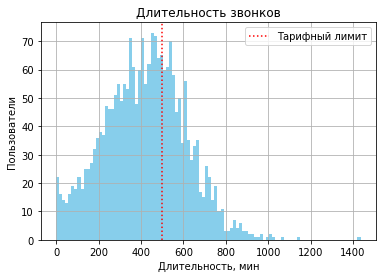

In [74]:
df_smart.hist(column='calls_duration', color='skyblue', bins=100)
plt.axvline(df_smart['minutes_included'].mean(), color='red', linestyle='dotted', label='Тарифный лимит')
plt.legend()
plt.xlabel('Длительность, мин')
plt.ylabel('Пользователи')
plt.title('Длительность звонков')
plt.show()

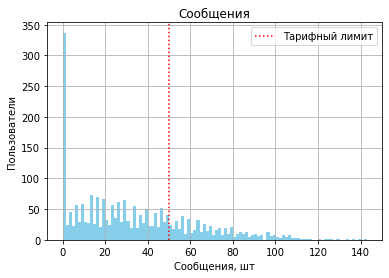

In [75]:
df_smart.hist(column='messages', color='skyblue', bins=100)
plt.axvline(df_smart['messages_included'].mean(), color='red', linestyle='dotted', label='Тарифный лимит')
plt.legend()
plt.xlabel('Сообщения, шт')
plt.ylabel('Пользователи')
plt.title('Сообщения')
plt.show()

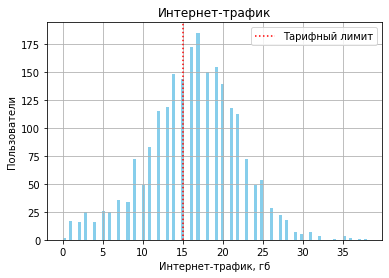

In [76]:
df_smart.hist(column='gb_used', color='skyblue', bins=100)
plt.axvline(df_smart['gb_per_month_included'].mean(), color='red', linestyle='dotted', label='Тарифный лимит')
plt.legend()
plt.xlabel('Интернет-трафик, гб')
plt.ylabel('Пользователи')
plt.title('Интернет-трафик')
plt.show()

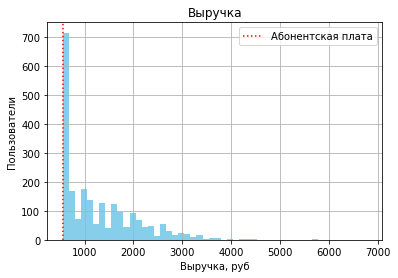

In [77]:
df_smart.hist(column='income', color='skyblue', bins=50)
plt.axvline(550, color='red', linestyle='dotted', label='Абонентская плата')
plt.legend()
plt.xlabel('Выручка, руб')
plt.ylabel('Пользователи')
plt.title('Выручка')
plt.show()

#### 4.1.1 Вывод

Выявили следующие данные о пользователях тарифа Смарт:
1. За год среднее время использования тарифа 8 месяцев.
2. В среднем в месяц пользователь:
    * общается 418 минут по телефону,
    * отправляет 33 сообщения,
    * использует 16 гб интернет-трафика.
3. Средний возраст клиента 46 лет.
4. Средняя выручка в месяц 1289 руб, при том, что абонентская плата 550 руб.
    * Стандартное отклонение 818 руб.
    * Медиана 1019 руб.
    * Размах от миниального к максимульному значению от 550 руб до 6770 руб.
5. По гистограммам видно, что в части звонков и сообщений пользователи редко выходят за тарифные лимиты, а в части интернет-трафика медиана и среднее значение выходят за пределы 15 гб.
    * Распределение у звонков и интернет-трафика ближе к нормальному.
    * Распределение у сообщений имеет пик на 0 и дальше длинный хвост в правой части. Это естественное положение дел, сообщения мало используются, так как более популярны мессенджеры.
6. Только 25% пользователей не выходят за тарифные лимиты.
7. Средняя переплата за превышение тарифных лимитов 1042 руб.

### 4.2 Пользователи тарифа Ультра

In [78]:
df_ultra = df.query('tariff == "ultra"')

In [79]:
df_ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,985.0,1263.094416,140.694908,1000.0,1143.0,1277.0,1381.0,1495.0
month,985.0,8.250761,2.871762,1.0,6.0,9.0,11.0,12.0
calls_duration,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0
messages,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0
gb_used,985.0,19.487310,9.851648,0.0,12.0,19.0,27.0,49.0
age,985.0,46.834518,17.107979,18.0,30.0,45.0,63.0,75.0
messages_included,985.0,1000.000000,0.000000,1000.0,1000.0,1000.0,1000.0,1000.0
minutes_included,985.0,3000.000000,0.000000,3000.0,3000.0,3000.0,3000.0,3000.0
gb_per_month_included,985.0,30.000000,0.000000,30.0,30.0,30.0,30.0,30.0
income,985.0,2070.000000,375.840521,1950.0,1950.0,1950.0,1950.0,4800.0


In [80]:
np.var(df_ultra['calls_duration'])

100771.2236172022

In [81]:
np.var(df_ultra['messages'])

2282.946075394882

In [82]:
np.var(df_ultra['gb_used'])

96.95643793965318

In [83]:
(df_ultra['income'][df_ultra['income'] == 1950].count() / df_ultra.shape[0]).round(2)

0.86

In [84]:
df_ultra['income'][df_ultra['income'] > 1950].mean() - 1950

882.0895522388059

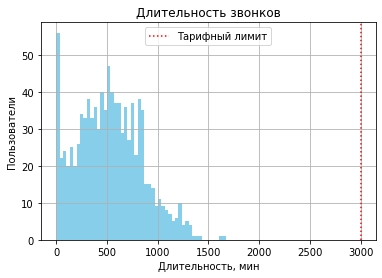

In [85]:
df_ultra.hist(column='calls_duration', color='skyblue', bins=50)
plt.axvline(df_ultra['minutes_included'].mean(), color='red', linestyle='dotted', label='Тарифный лимит')
plt.legend()
plt.xlabel('Длительность, мин')
plt.ylabel('Пользователи')
plt.title('Длительность звонков')
plt.show()

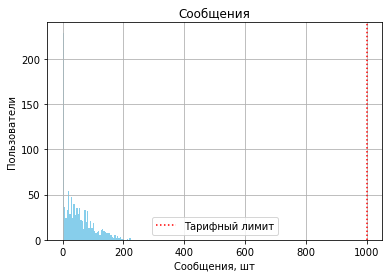

In [86]:
df_ultra.hist(column='messages', color='skyblue', bins=50)
plt.axvline(df_ultra['messages_included'].mean(), color='red', linestyle='dotted', label='Тарифный лимит')
plt.legend()
plt.xlabel('Сообщения, шт')
plt.ylabel('Пользователи')
plt.title('Сообщения')
plt.show()

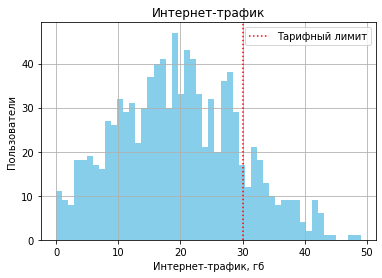

In [87]:
df_ultra.hist(column='gb_used', color='skyblue', bins=50)
plt.axvline(df_ultra['gb_per_month_included'].mean(), color='red', linestyle='dotted', label='Тарифный лимит')
plt.legend()
plt.xlabel('Интернет-трафик, гб')
plt.ylabel('Пользователи')
plt.title('Интернет-трафик')
plt.show()

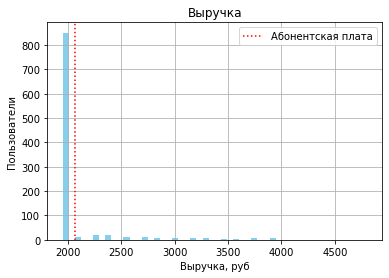

In [88]:
df_ultra.hist(column='income', color='skyblue', bins=50)
plt.axvline(df_ultra['income'].mean(), color='red', linestyle='dotted', label='Абонентская плата')
plt.legend()
plt.xlabel('Выручка, руб')
plt.ylabel('Пользователи')
plt.title('Выручка')
plt.show()

#### 4.2.1 Вывод

Выявили следующие данные о пользователях тарифа Смарт:
1. За год среднее время использования тарифа 8 месяцев.
2. В среднем в месяц пользователь:
    * общается 527 минут по телефону,
    * отправляет 49 сообщений,
    * использует 20 гб интернет-трафика.
3. Средний возраст клиента 47 лет.
4. Средняя выручка в месяц 2070 руб, при том, что абонентская плата 1950 руб.
    * Стандартное отклонение 376 руб.
    * Медиана 1950 руб.
    * Размах от миниального к максимульному значению от 1950 руб до 4800 руб.
5. По гистограммам видно, что пользователи редко выходят за тарифные лимиты.
    * Распределение у звонков и интернет-трафика ближе к нормальному.
    * Распределение у сообщений имеет пик на 0 и дальше длинный хвост в правой части. Это естественное положение дел, сообщения мало используются, так как более популярны мессенджеры.
6. 86% пользователей не выходят за тарифные лимиты.
7. Средняя переплата за превышение тарифных лимитов 882 руб.

## 5. Проверка гипотез

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

### 5.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**H₀**: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

**H₁**: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

**Пороговое значение alpha**: 0.05

In [89]:
df.pivot_table(index='tariff', values='income', aggfunc=['count', 'mean', 'sum'])

,count,mean,sum
,income,income,income
tariff,,,
smart,2229,1288.896815,2872951
ultra,985,2070.000000,2038950


In [90]:
np.var(df_smart['income'])

668930.3931213078

In [91]:
np.var(df_ultra['income'])

141112.69035532995

In [92]:
results = st.stats.ttest_ind(df_ultra['income'], df_smart['income'], equal_var=False)

In [93]:
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Отвергаем нулевую гипотезу.


#### 5.1.1 Вывод

По результатам анализа отвергаем нулевую гипотезу и принимаем, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

### 5.2 Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

**H₀**: Cредняя выручка пользователей из Москвы и средняя выручка пользователей из остальных регионов равны.

**H₁**: Cредняя выручка пользователей из Москвы и средняя выручка пользователей из остальных регионов не равны.

**Пороговое значение alpha**: 0.05

In [94]:
df_users.query('city == "Москва"').count()

user_id    99
age        99
city       99
tariff     99
dtype: int64

In [95]:
df_users.groupby('tariff')['user_id'].count()

tariff
smart    351
ultra    149
Name: user_id, dtype: int64

In [96]:
df_moscow = df.query('city == "Москва"')['income']

In [97]:
df_moscow.mean()

1545.8134206219313

In [98]:
df_not_moscow = df.query('city != "Москва"')['income']

In [99]:
df_not_moscow.mean()

1524.1678832116788

In [100]:
np.var(df_moscow)

564945.3923567117

In [101]:
np.var(df_not_moscow)

653637.4635555295

In [102]:
results2 = st.stats.ttest_ind(df_moscow, df_not_moscow)

In [103]:
alpha = .05
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Не получилось отвергнуть нулевую гипотезу.


#### 5.2.1 Вывод

По результатам анализа принимаем нулевую гипотезу о том, что средняя выручка пользователей из Москвы и средняя выручка пользователей из остальных регионов равны.

## 6. Общий вывод

### Задача исследования: проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Выделили следующие данные:**
1. Тариф Смарт:
    * Средняя выручка в месяц 1289 руб, при том, что абонентская плата 550 руб.
    * Только 25% пользователей не выходят за тарифные лимиты.
    * Средняя переплата за превышение тарифных лимитов 1042 руб.
2. Тариф Ультра:
    * Средняя выручка в месяц 2070 руб, при том, что абонентская плата 1950 руб.
    * 86% пользователей не выходят за тарифные лимиты.
    * Средняя переплата за превышение тарифных лимитов 882 руб.

**Проверили гипотезы:**
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.
    * Средняя выручка пользователей тарифа Ультра 2070 руб. Общая выручка за год составляет 2 038 950 руб.
    * Средняя выручка пользователей тарифа Смарт 1289 руб. Общая выручка за год составляет 2 872 951 руб.
2. Средняя выручка пользователей из Москвы и средняя выручка пользователей из остальных регионов равны.
    * Средняя выручка пользователей из Москвы 1546 руб.
    * Средняя выручка пользователей из других регионов 1524 руб.

**Вывод:**
* 75% пользователей тарифа Смарт превышают тарифные лимиты и приносят компании дополнительную выручку. У тарифа Ультра только 14% пользователей превышают лимиты. При этом средняя переплата не сильно отличается друг от друга (1042 руб в тарифе Смарт и 882 руб в тарифе Ультра).
* Мы выяснилии, что средняя выручка тарифа Ультра больше, чем тарифа Смарт. Стоит обратить также внимание на то, что пользователей тарифа Смарт 70% от всей выборки. При этом они приносят в год выручки только на 41 процент больше, чем пользователи тарифа Ультра. При расчете средних расходов на обслуживание 1 клиента можно будет получить более реальную картину получаемой прибыли.

**По результатам данного анализа рекомендуем увеличить рекламные бюджеты для тарифа Ультра.**